Data from `https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/data` with some marginal preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
telecom_cust = pd.read_csv('telecom_churn.csv')

In [3]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
telecom_cust.dtypes.sort_values()

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
customerID           object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
gender               object
TotalCharges         object
Churn                object
dtype: object

In [47]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
telecom_cust.dropna(inplace=True)

In [48]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [49]:
telecom_cust.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [50]:
# Convert the predictor variable in a binary numeric variable
telecom_cust['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom_cust['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(telecom_cust.drop('customerID', axis=1))
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

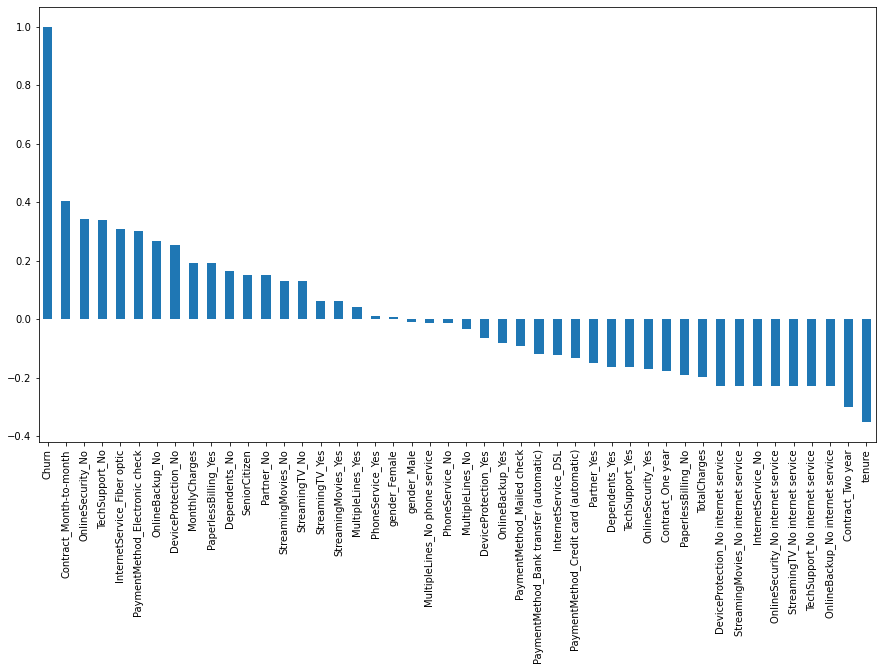

In [9]:
# Plot `Churn` correlation with features

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [10]:
df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

### `Monthly contracts`, an `absense of online security` and `technical support` positively affect Churn. In 

### contrast, being a `tenure` customer, having a `2-years contract` and `not having an internet service` negatively

### affect Churn.

# Quick EDA

## 1. Demography


### Females, Males are 50-50

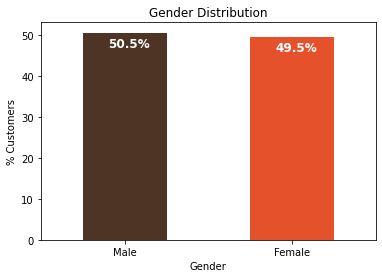

In [11]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### On average Female customers spend 1 more dollar on service (per month), there is no difference in median spendings though

In [12]:
telecom_cust.groupby('gender')['MonthlyCharges'].agg(['mean', 'max'])

,mean,max,median
gender,,,
Female,65.204243,118.75,70.65
Male,64.327482,118.35,70.10


### There are only 16% of seniors

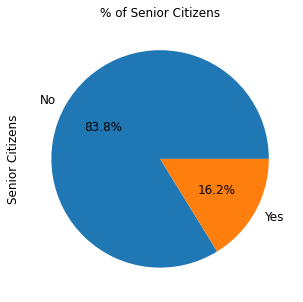

In [13]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12);

### Senior Citizens spends significantly more money on services (why?)

In [14]:
telecom_cust.groupby('SeniorCitizen')['MonthlyCharges'].agg(['mean', 'max', 'median'])

,mean,max,median
SeniorCitizen,,,
0,61.847441,118.75,65.80
1,79.820359,117.45,84.85


### 50% of customers have a partner, 30% of customers have a dependent

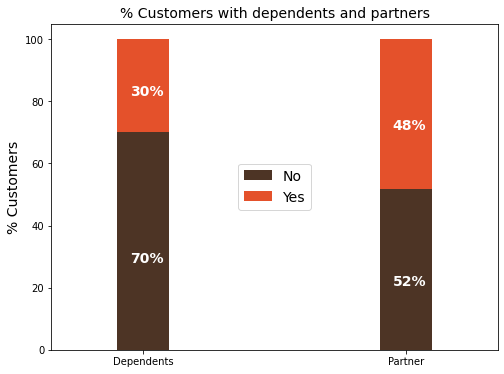

In [15]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


### Customers with partners spend more compared to customers without partners

In [16]:
telecom_cust.groupby('Partner')['MonthlyCharges'].agg(['mean', 'max', 'median'])

,mean,max,median
Partner,,,
No,61.945001,118.65,68.65
Yes,67.776264,118.75,74.80


## 2. Tenure and type of a contract

### There are two large groups: senior customers and customers who use the service for 1-2 months

/home/anvar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

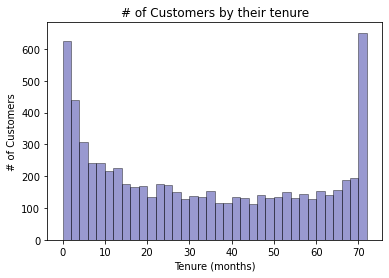

In [17]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')


### Most of the customers are on 1-month contract

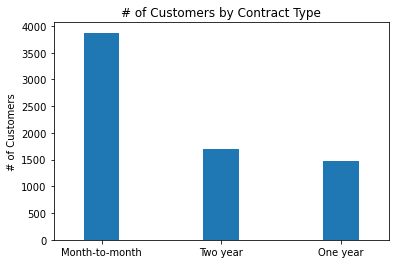

In [18]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type');

### How tenure depends on the type of the contract?

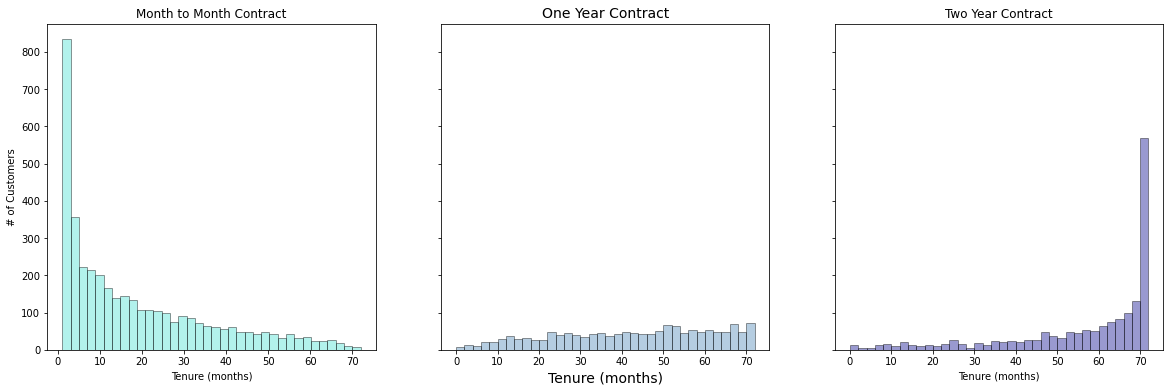

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract');


2-year contract clients are more loyal: most of the month-to-month clients use services for 1-2 months in total, while most 2-year contract clients use services for >50 months (>4 years).

## 3. What about additional services?

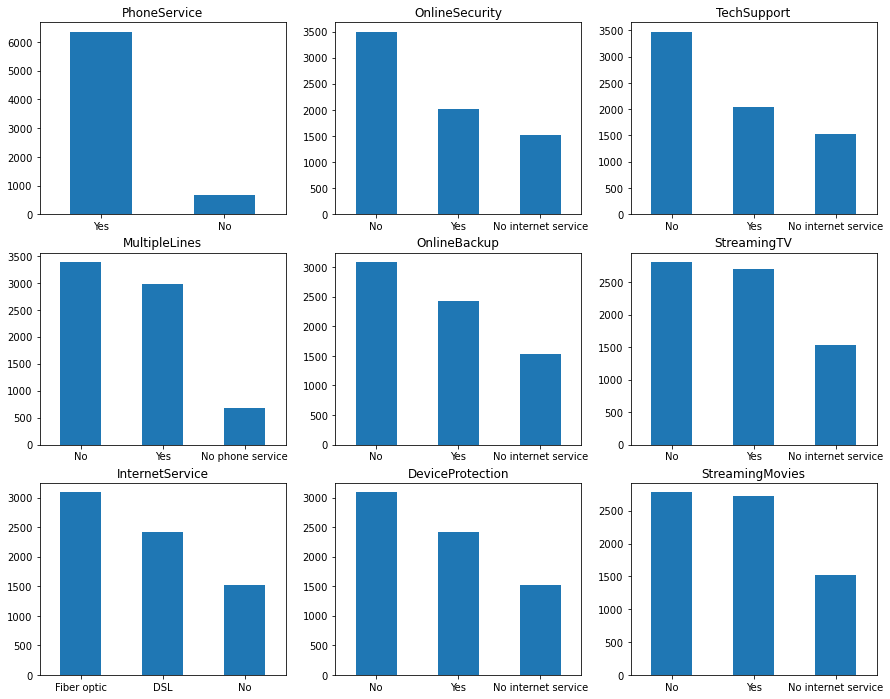

In [20]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


### Among Senior Citizens 95% do you an InternetService, while for others it is only 75%

In [21]:
telecom_cust.groupby('SeniorCitizen')['InternetService'].value_counts()

SeniorCitizen  InternetService
0              Fiber optic        2265
               DSL                2162
               No                 1474
1              Fiber optic         831
               DSL                 259
               No                   52
Name: InternetService, dtype: int64

### We observe the same trend for Tech Support

In [22]:
telecom_cust.groupby('SeniorCitizen')['TechSupport'].value_counts()

SeniorCitizen  TechSupport        
0              No                     2643
               Yes                    1784
               No internet service    1474
1              No                      830
               Yes                     260
               No internet service      52
Name: TechSupport, dtype: int64

# 4. What about Churn (target column)?

### There are 73% of customers who do not Churn, and 27% who churn

In [23]:
telecom_cust['Churn'].value_counts() / len(telecom_cust) * 100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

### On average customers who do not churn use services for 38 months

In [24]:
telecom_cust.groupby('Churn').tenure.agg(['mean', 'median', 'std'])

,mean,median,std
Churn,,,
0,37.569965,38,24.113777
1,17.979133,10,19.531123


### There are 43% of Churned customers among month-to-month users, 11% among customers with 1-year contract, and only 3% among those with 2-year contract

In [25]:
telecom_cust.groupby('Contract').Churn.mean()

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

# Churn prediction

In [26]:
from sklearn.model_selection import train_test_split

X = telecom_cust.drop(['customerID', 'Churn'], axis=1)
y = telecom_cust['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [28]:
from catboost import CatBoostClassifier, Pool

In [29]:
cat_features = list(X_train.dtypes.sort_values().iloc[4:].index)

print('Categorical features:', cat_features)

dataset_train = Pool(X_train, y_train, cat_features)
dataset_test = Pool(X_test, y_test, cat_features)

Categorical features: ['PaymentMethod', 'PaperlessBilling', 'Contract', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender', 'OnlineSecurity', 'InternetService', 'MultipleLines', 'PhoneService', 'Dependents', 'Partner', 'DeviceProtection', 'OnlineBackup']


In [30]:
model = CatBoostClassifier()

model.fit(dataset_train, eval_set=dataset_test,
          verbose=50)

Learning rate set to 0.046994
0:	learn: 0.6680793	test: 0.6680686	best: 0.6680686 (0)	total: 53.8ms	remaining: 53.8s
50:	learn: 0.4097503	test: 0.4174288	best: 0.4174288 (50)	total: 238ms	remaining: 4.43s
100:	learn: 0.3918644	test: 0.4110088	best: 0.4110088 (100)	total: 426ms	remaining: 3.79s
150:	learn: 0.3836758	test: 0.4105058	best: 0.4101906 (127)	total: 612ms	remaining: 3.44s
200:	learn: 0.3756419	test: 0.4092946	best: 0.4092946 (200)	total: 806ms	remaining: 3.2s
250:	learn: 0.3665026	test: 0.4097376	best: 0.4092311 (211)	total: 1.02s	remaining: 3.03s
300:	learn: 0.3558649	test: 0.4104209	best: 0.4092311 (211)	total: 1.23s	remaining: 2.86s
350:	learn: 0.3461617	test: 0.4125093	best: 0.4092311 (211)	total: 1.44s	remaining: 2.67s
400:	learn: 0.3367490	test: 0.4129623	best: 0.4092311 (211)	total: 1.66s	remaining: 2.48s
450:	learn: 0.3281583	test: 0.4142699	best: 0.4092311 (211)	total: 1.88s	remaining: 2.29s
500:	learn: 0.3208164	test: 0.4152229	best: 0.4092311 (211)	total: 2.1s	rema

In [31]:
y_pred_test = model.predict_proba(X_test)
y_pred_train = model.predict_proba(X_train)

In [ ]:
y(Churn) = 0.3

threshold = 0.10

In [52]:
y_pred_train

array([[0.99019801, 0.00980199],
       [0.93022933, 0.06977067],
       [0.71329304, 0.28670696],
       ...,
       [0.45245022, 0.54754978],
       [0.68684172, 0.31315828],
       [0.58828483, 0.41171517]])

In [32]:
print(roc_auc_score(y_train, y_pred_train[:, 1]))

0.869105836665498


In [33]:
print(roc_auc_score(y_test, y_pred_test[:, 1]))

0.8531312529803259


In [34]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train[:, 1])

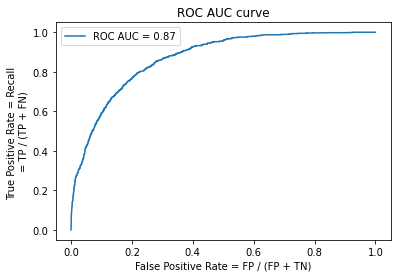

In [35]:
plt.plot(fpr, tpr, label=f'ROC AUC = {np.round(roc_auc_score(y_train, y_pred_train[:, 1]), 2)}');
plt.legend()
plt.xlabel('False Positive Rate = FP / (FP + TN)')
plt.ylabel('True Positive Rate = Recall \n= TP / (TP + FN)')
plt.title('ROC AUC curve');

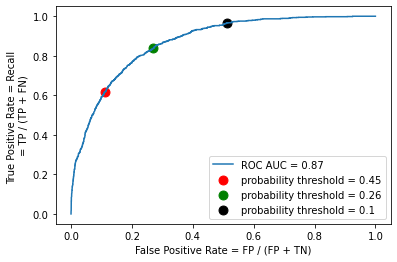

In [36]:
plt.plot(fpr, tpr, label=f'ROC AUC = {np.round(roc_auc_score(y_train, y_pred_train[:, 1]), 2)}');
plt.scatter(fpr[500], tpr[500], c='r', s=80, label=f'probability threshold = {np.round(thresholds[500], 2)}')
plt.scatter(fpr[900], tpr[900], c='g', s=80, label=f'probability threshold = {np.round(thresholds[900], 2)}')
plt.scatter(fpr[1200], tpr[1200], c='k', s=80, label=f'probability threshold = {np.round(thresholds[1200], 2)}')
plt.legend()
plt.xlabel('False Positive Rate = FP / (FP + TN)')
plt.ylabel('True Positive Rate = Recall \n= TP / (TP + FN)');

In [37]:
threshold = 0.25

accuracy_score(y_train, (y_pred_train[:, 1] > threshold).astype(int))

0.755578093306288

In [38]:
threshold = 0.5

accuracy_score(y_train, (y_pred_train[:, 1] > threshold).astype(int))

0.8178498985801217

In [39]:
threshold = 0.75

accuracy_score(y_train, (y_pred_train[:, 1] > threshold).astype(int))

0.774239350912779

In [40]:
threshold = 0.25

tn, fp, fn, tp = confusion_matrix(y_train, (y_pred_train[:, 1] > threshold).astype(int)).ravel()

print(f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}')

TN: 2618 FP: 1010 FN: 195 TP: 1107


In [41]:
threshold = 0.5

tn, fp, fn, tp = confusion_matrix(y_train, (y_pred_train[:, 1] > threshold).astype(int)).ravel()

print(f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}')

TN: 3317 FP: 311 FN: 587 TP: 715


In [42]:
threshold = 0.75

tn, fp, fn, tp = confusion_matrix(y_train, (y_pred_train[:, 1] > threshold).astype(int)).ravel()

print(f'TN: {tn}', f'FP: {fp}', f'FN: {fn}', f'TP: {tp}')

TN: 3606 FP: 22 FN: 1091 TP: 211
